<!--#  **ML Campus Batch Aug 2022 - Bangalore**
<br>


### **Problem** :
 -->
# Build a two-layer neural network in py
 .
<!--
### **Description** : To gain a better understanding of Deep Learning, build a Neural
Network from scratch using only python, without a deep learning library like
TensorFlow. Understanding the inner workings of a Neural Network is important to
a ML Engineer.
<br>

**Dataset**: [MNIST](http://yann.lecun.com/exdb/mnist/)



<br>


###### submitted by: Neeraj Ganji 
###### submitted on: 7th NOV 2022

ID: 23133
-->

<br>
<br>
<br>
<br>
<br>
<br>

##### Importing the numpy, pandas Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Reading the MNIST dataset in csv file.

##### We downloaded the MNIST dataset from kaggle in .CSV format

In [2]:
data = pd.read_csv('C:/Users/hp/Desktop/mle/week1/MNIST.csv')

In [3]:
data=np.array(data)

creating the test and training dataset from the given data

In [6]:
data = np.array(data)
m, n = data.shape
print(m,n)
data[0].shape

42000 785


(785,)

In [7]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255



In [8]:
X_train.shape

(784, 41000)

creating ReLU, softmax functions.

In [9]:
def parameters():
    W1=np.random.rand(10,784) - 0.5
    b1=np.random.rand(10,1) - 0.5
    W2=np.random.rand(10,10) - 0.5
    b2=np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(x):
    return np.maximum(x,0)

def softmax(x):
    arr = np.exp(x)/sum(np.exp(x))
    return arr

def ReLU_Deriv(x):
    return x>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

creating forward and backward propagation functions

In [10]:

def forwardpropagation(W1,b1,W2,b2,X):
    Z1=W1.dot(X) + b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1) + b2
    A2=softmax(Z2)
    return Z1, A1, Z2, A2

def backwardpropagation(Z1,A1,Z2,A2,W1,W2,X,Y):
    m=Y.size
    Y_hot=one_hot(Y)
    dZ2=A2-Y_hot
    dW2=1/m * dZ2.dot(A1.T)
    db2=1/m * np.sum(dZ2)
    dZ1=W2.T.dot(dZ2) * ReLU_Deriv(Z1)
    dW1=1/m * dZ1.dot(X.T)
    db1=1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_parameters(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    


creating predict, gradient descent and accuracy functions.

In [11]:
def get_prediction(A2):
    return np.argmax(A2,0)

def Accuracy(prediction,Y):
    return np.sum(prediction == Y) / Y.size * 100


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 =parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forwardpropagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backwardpropagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            prediction = get_prediction(A2)
            print(Accuracy(prediction, Y))
    return W1, b1, W2, b2

        

In [12]:
W1,b1,W2,b2=parameters()
Z1,A1,Z2,A2=forwardpropagation(W1,b1,W2,b2,X_train)

Now, we train the model.

In [13]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,0.19,500)

Iteration:  0
11.019512195121951
Iteration:  10
25.2390243902439
Iteration:  20
33.94390243902439
Iteration:  30
39.4
Iteration:  40
45.514634146341464
Iteration:  50
51.1219512195122
Iteration:  60
55.209756097560984
Iteration:  70
58.12926829268292
Iteration:  80
60.58292682926829
Iteration:  90
62.91951219512195
Iteration:  100
64.91463414634147
Iteration:  110
66.71219512195123
Iteration:  120
68.32682926829268
Iteration:  130
69.69024390243902
Iteration:  140
70.89268292682927
Iteration:  150
72.02195121951219
Iteration:  160
73.1341463414634
Iteration:  170
73.99512195121952
Iteration:  180
74.81463414634146
Iteration:  190
75.59268292682927
Iteration:  200
76.42682926829268
Iteration:  210
77.20243902439024
Iteration:  220
77.92682926829269
Iteration:  230
78.56585365853658
Iteration:  240
79.20243902439024
Iteration:  250
79.78048780487805
Iteration:  260
80.27317073170732
Iteration:  270
80.6829268292683
Iteration:  280
81.1219512195122
Iteration:  290
81.50731707317073
Iterat

using softmax as thier prediction will be better than ReLU.

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    abc,bcd,cde, A2 = forwardpropagation(W1, b1, W2, b2, X)
    predictions = get_prediction(A2)
    return predictions

In [13]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


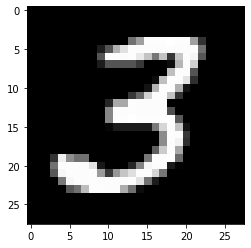

In [14]:
test_prediction(25,W1,b1,W2,b2)

Prediction:  [0]
Label:  0


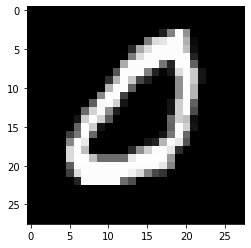

In [15]:
test_prediction(35,W1,b1,W2,b2)

Prediction:  [1]
Label:  1


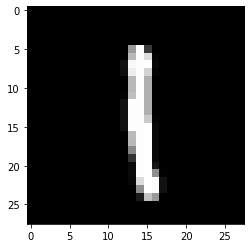

In [16]:
test_prediction(45,W1,b1,W2,b2)

Prediction:  [5]
Label:  5


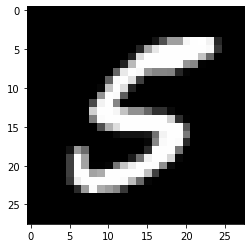

In [17]:
test_prediction(65,W1,b1,W2,b2)

Prediction:  [3]
Label:  8


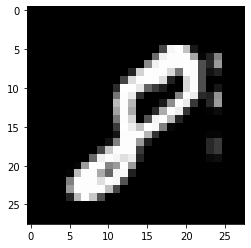

In [18]:
test_prediction(75,W1,b1,W2,b2)

Prediction:  [1]
Label:  1


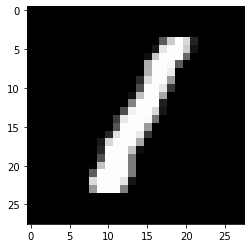

In [19]:
test_prediction(95,W1,b1,W2,b2)

Prediction:  [1]
Label:  1


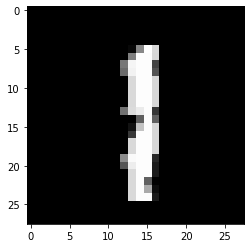

In [20]:
test_prediction(15,W1,b1,W2,b2)

# Thank you